In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

IBMQ.load_account()

provider = IBMQ.get_provider(group='open')


Import the job in which you run the Bell state in Exercise 1:

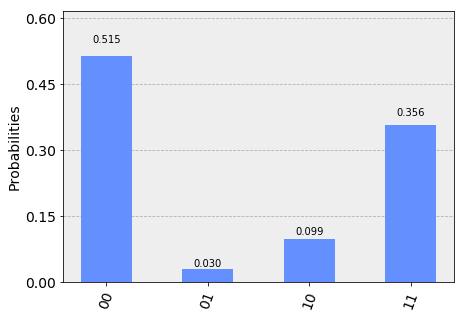

In [3]:
backend=provider.get_backend('ibmqx4')
job=backend.retrieve_job('5cce8c3a433e6300735a811f')
raw_result = job.result()
raw_counts=raw_result.get_counts()

plot_histogram(raw_counts)

As we see...it is not perfect result (why?). Let's try to improve it by mitigating measurement errors...

In [5]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,CompleteMeasFitter)

qr = QuantumRegister(5)
meas_cals, state_labels = complete_meas_cal(qubit_list=[0,2], qr=qr)

`meas_cals` represents a set of circuits which we need to run to understand what measurement errors are, so that we can mitigate...

### Exercise: check how many circuits `meas_cals` has, visualize them and explain what they represent

In [6]:
#Now run the experiment with meas_cals as input set of circuits:
#   job = execute(meas_cals, backend=backend, shots=1024)
#I'm importing it here from previous run:
calibration_job=backend.retrieve_job('5cce0ca12e585300709f30b5')
cal_results = calibration_job.result()

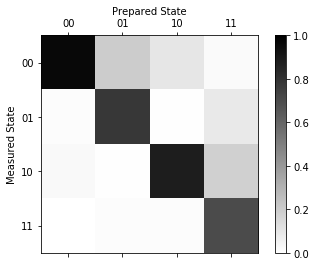

In [7]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_fitter.plot_calibration()

In [8]:
# Create a measurement filter from the calibration matrix
meas_filter = meas_fitter.filter

# Apply the filter to the raw counts to mitigate 
# the measurement errors
mitigated_counts = meas_filter.apply(raw_counts)

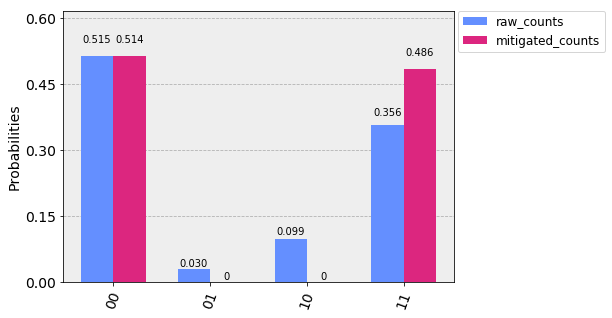

In [9]:
plot_histogram([raw_counts, mitigated_counts], 
               legend=["raw_counts", "mitigated_counts"])